## Import required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read the input image

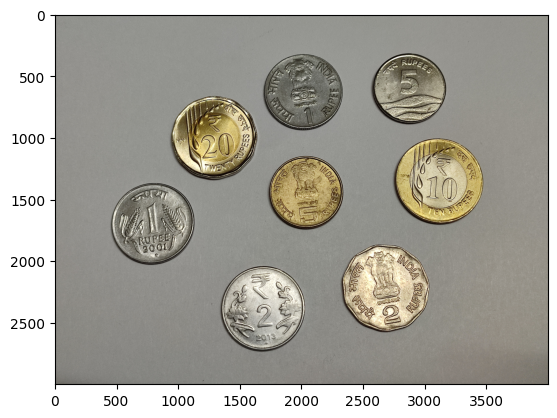

In [6]:
img = cv2.imread('/content/coins.jpg')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## Convert to gray scale image

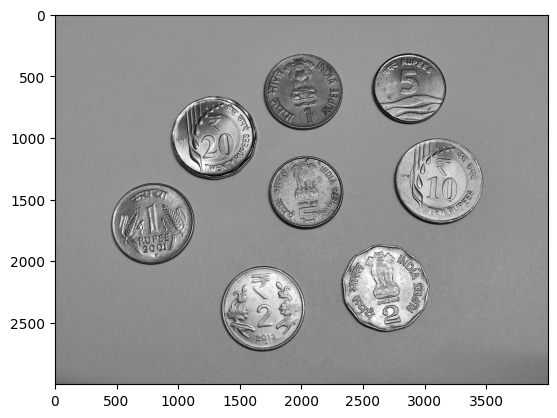

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 1)
plt.imshow(blurred_img, cmap='gray')

## Plot the histogram of the blurred image

(array([4.00000e+00, 4.10000e+01, 3.05000e+02, 9.99000e+02, 1.66100e+03,
        2.24500e+03, 3.00600e+03, 3.54700e+03, 4.03300e+03, 4.56500e+03,
        5.19400e+03, 5.47200e+03, 5.38200e+03, 5.30200e+03, 5.37800e+03,
        5.43600e+03, 5.62600e+03, 5.69900e+03, 5.63000e+03, 5.69200e+03,
        5.68200e+03, 5.70900e+03, 5.85900e+03, 5.64900e+03, 5.82200e+03,
        5.74400e+03, 5.79500e+03, 5.78800e+03, 5.83600e+03, 5.97900e+03,
        5.92700e+03, 6.06800e+03, 5.96400e+03, 6.00800e+03, 5.97800e+03,
        5.94900e+03, 5.98600e+03, 5.93800e+03, 5.94700e+03, 6.08700e+03,
        6.07600e+03, 6.12200e+03, 6.14800e+03, 6.17900e+03, 6.16000e+03,
        6.11300e+03, 6.18800e+03, 5.99000e+03, 6.05800e+03, 5.96700e+03,
        6.04500e+03, 6.07300e+03, 5.91900e+03, 5.89900e+03, 5.95700e+03,
        5.89800e+03, 6.16800e+03, 6.31100e+03, 6.31900e+03, 6.41200e+03,
        6.17700e+03, 6.50000e+03, 6.60400e+03, 6.76800e+03, 6.88300e+03,
        7.05900e+03, 7.00400e+03, 7.44500e+03, 7.21

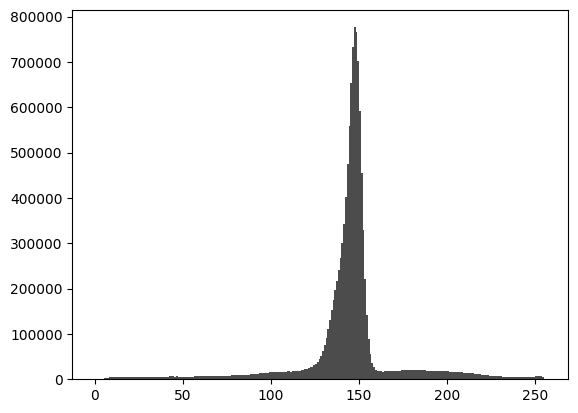

In [8]:
plt.hist(blurred_img.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)

## Perform thresholding to segment the coins

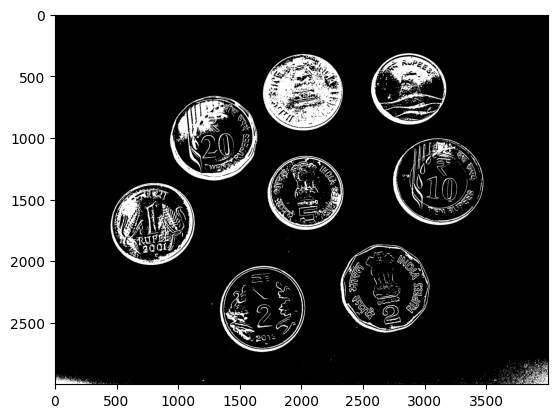

In [9]:
threshold_value = 120
_, thresholded_image = cv2.threshold(blurred_img, threshold_value, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresholded_image, cmap='gray')

## Perform thresholding with OTSU's method

108.0


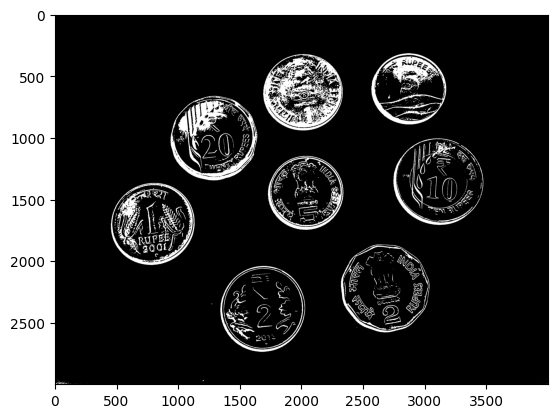

In [11]:
(thresh, otsu_thresholded_image) = cv2.threshold(blurred_img, 0, 255,
                                                 cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(thresh)
plt.imshow(otsu_thresholded_image, cmap='gray')

## Perform thresholding with adaptive thresholding method

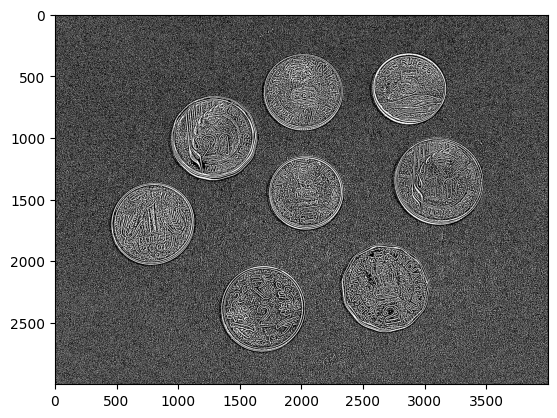

In [14]:
adaptive_thresholded_image = cv2.adaptiveThreshold(blurred_img, 255,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        11, 2)
plt.imshow(adaptive_thresholded_image, cmap='gray')